In [1]:
%pylab inline
import pandas as pd
%cd "/Users/yoavfreund/Google Drive File Stream/My Drive/Microphone Arrays/CSV/"
!ls -lrt | tail

Populating the interactive namespace from numpy and matplotlib
/Volumes/GoogleDrive/My Drive/Microphone Arrays/CSV
total 616
-r--------  0 yoavfreund  staff      0 Dec 31  1969 Icon
-rw-------@ 1 yoavfreund  staff  24630 Sep 13 14:06 ODAS0.csv
-rw-------  1 yoavfreund  staff  31833 Sep 13 14:06 ODAS2.csv
-rw-------  1 yoavfreund  staff  30910 Sep 13 14:06 ODAS1.csv
-rw-------  1 yoavfreund  staff  33846 Sep 13 20:21 ODAS3.csv
-rw-------  1 yoavfreund  staff  86113 Sep 16 12:05 combined.csv


In [2]:
cdf = pd.read_csv('combined.csv'); #,index_col='start time')
cdf.head()

,start time,sensor,File,End Time,Timestamp Length(ms),Total Timestamps,0 source detected,1 source detected,2 source detected,3 source detected,4 source detected
0,2019-09-09 14:45:11.427053,0,cSST_2019-09-09_14:45:11.log,2019-09-09 14:49:57.625110,7.9988,35780,8625,25197,1727,112,119
1,2019-09-09 14:45:12.438027,1,cSST_2019-09-09_14:45:12.log,2019-09-09 14:49:58.735869,7.9978,35797,29083,6624,90,0,0
2,2019-09-09 14:50:03.745063,0,cSST_2019-09-09_14:50:03.log,2019-09-09 14:54:50.063201,7.9973,35802,33544,2258,0,0,0
3,2019-09-09 14:50:11.480119,2,cSST_2019-09-09_14:50:11.log,2019-09-09 14:54:57.630740,7.9997,35770,34493,1277,0,0,0
4,2019-09-09 14:55:03.883986,1,cSST_2019-09-09_14:55:03.log,2019-09-09 14:59:50.172443,7.9978,35796,35203,593,0,0,0


In [ ]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=[15,5])
cdf.plot.line(x='start time',y='1 source detected',rot=45,figsize=[15,5],ax=ax);

In [5]:
# Trying to make the tick marks and their labels easier to read
# https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/date.html

date_fmt = '%a %H:%M:%S'

ax.xaxis_date()

formatter = dates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(formatter)

NameError: name 'dates' is not defined

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11ccb50d0> (for post_execute):


ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [71]:
#fig, ax = plt.subplots()
#df_ts=cdf
# Make most of the ticklabels empty so the labels don't get too crowded
#ticklabels = ['']*len(df_ts.index)
# Every 4th ticklable shows the month and day
#ticklabels[::4] = [item.strftime('%b %d') for item in df_ts.index[::4]]
# Every 12th ticklabel includes the year
#ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in df_ts.index[::12]]
#ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
#plt.gcf().autofmt_xdate()

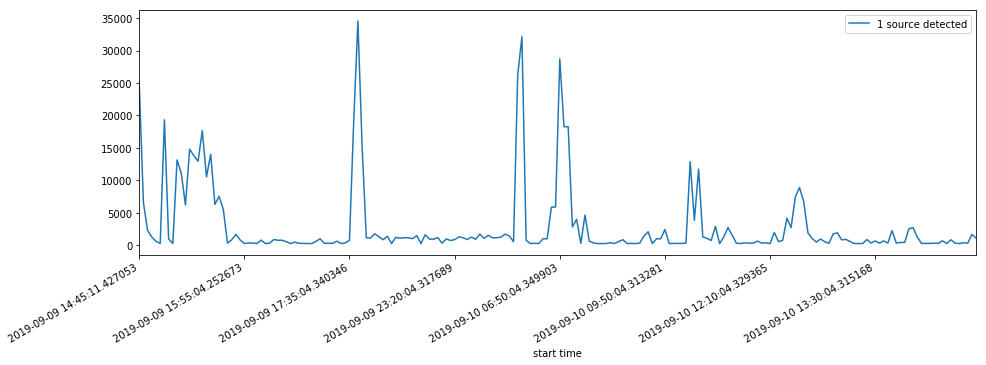

In [63]:
fig, ax = plt.subplots()

cdf.iloc[:200,:].plot.line(x='start time',y='1 source detected',rot=45,figsize=[15,5],ax=ax);

# Create your formatter object and change the xaxis formatting.

date_fmt = '%a %H:%M:%S'

ax.xaxis_date()

formatter = dates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(formatter)

plt.gcf().autofmt_xdate()

plt.show()

AttributeError: 'list' object has no attribute 'to_pydatetime'

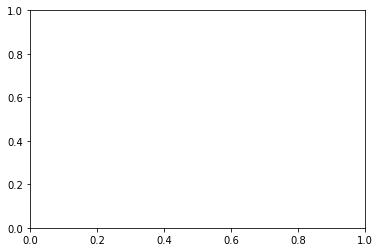

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as dates

idx = cdf['start time']
s = cdf['1 source detected']

fig, ax = plt.subplots()
ax.plot_date(idx.to_pydatetime(), s, 'v-')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
plt.tight_layout()
plt.show()

In [6]:
cdf.shape

(746, 11)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Series.data is deprecated and will be removed in a future version
  del sys.path[0]


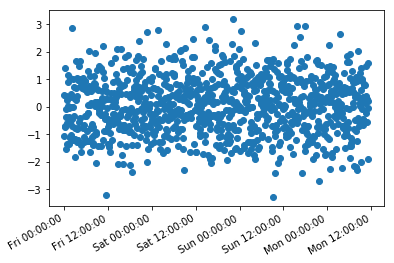

In [35]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import dates

# Generate some random data and plot it

time = pd.date_range('07/11/2014', periods=1000, freq='5min')
ts = pd.Series(pd.np.random.randn(len(time)), index=time)

fig, ax = plt.subplots()

ax.plot_date(ts.index.to_pydatetime(), ts.data)

# Create your formatter object and change the xaxis formatting.

date_fmt = '%a %H:%M:%S'

formatter = dates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(formatter)

plt.gcf().autofmt_xdate()

plt.show()